## Vertical Notch Reject and Notch Pass Implementation

Lorem ipsum dolor sit amet

In [1]:
import cv2 as cv
import numpy as np
from tkinter import Tk, filedialog
import matplotlib.pyplot as plt

In [2]:
def open_file_dialog():
    root = Tk()
    root.withdraw() 
    file_path = filedialog.askopenfilename(
        title="Pilih Gambar",
        filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")]
    )
    return file_path

def convert_to_grayscale(img):
    if len(img.shape) == 3:
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

In [3]:
def apply_fft(img):
    # Mengaplikasikan FFT kepada citra
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

    return fshift, magnitude_spectrum

def apply_ifft(fshift):
    # Mengembalikan citra ke domain spasial
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

In [15]:
def vertical_notch_reject(fshift, notch_center, notch_width=10):
    rows, cols = fshift.shape
    center_row = rows // 2
    
    # Menghapus frekuensi vertikal di sekitar titik notch_center
    for i in range(center_row - notch_width, center_row + notch_width):
        fshift[i, notch_center - notch_width : notch_center + notch_width] = 0
    
    return fshift

In [18]:
def notch_pass(fshift, notch_center, notch_width=10):
    rows, cols = fshift.shape
    mask = np.zeros(fshift)

    # Membuat mask yang melewatkan frekuensi pada sekitar titik notch_center
    center_row = rows // 2
    for i in range(center_row - notch_width, center_row + notch_width):
        mask[i, notch_center - notch_width : notch_center + notch_width] = 1
    
    return fshift * mask

In [9]:
def visualize(img, fshift, fshift_vnr, fshift_np):
    """
    Menampilkan gambar asli dan hasil setelah filter dengan spektrumnya
    """
    img_back_vnr = apply_ifft(fshift_vnr)
    img_back_np = apply_ifft(fshift_np)
    
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    magnitude_spectrum_vnr = 20 * np.log(np.abs(fshift_vnr) + 1)
    magnitude_spectrum_np = 20 * np.log(np.abs(fshift_np) + 1)
    
    # Membuat plot 2x3
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Gambar asli dan spektrum
    axes[0, 0].imshow(img, cmap='gray')
    axes[0, 0].set_title('Gambar Awal')
    axes[0, 0].axis('off')

    axes[1, 0].imshow(magnitude_spectrum, cmap='gray')
    axes[1, 0].set_title('Spektrum Awal')
    axes[1, 0].axis('off')

    # Gambar setelah Vertical Notch Reject dan spektrumnya
    axes[0, 1].imshow(img_back_vnr, cmap='gray')
    axes[0, 1].set_title('Vertical Notch Reject')
    axes[0, 1].axis('off')

    axes[1, 1].imshow(magnitude_spectrum_vnr, cmap='gray')
    axes[1, 1].set_title('Spektrum Vertical Notch Reject')
    axes[1, 1].axis('off')

    # Gambar setelah Notch Pass dan spektrumnya
    axes[0, 2].imshow(img_back_np, cmap='gray')
    axes[0, 2].set_title('Notch Pass')
    axes[0, 2].axis('off')

    axes[1, 2].imshow(magnitude_spectrum_np, cmap='gray')
    axes[1, 2].set_title('Spektrum Notch Pass')
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

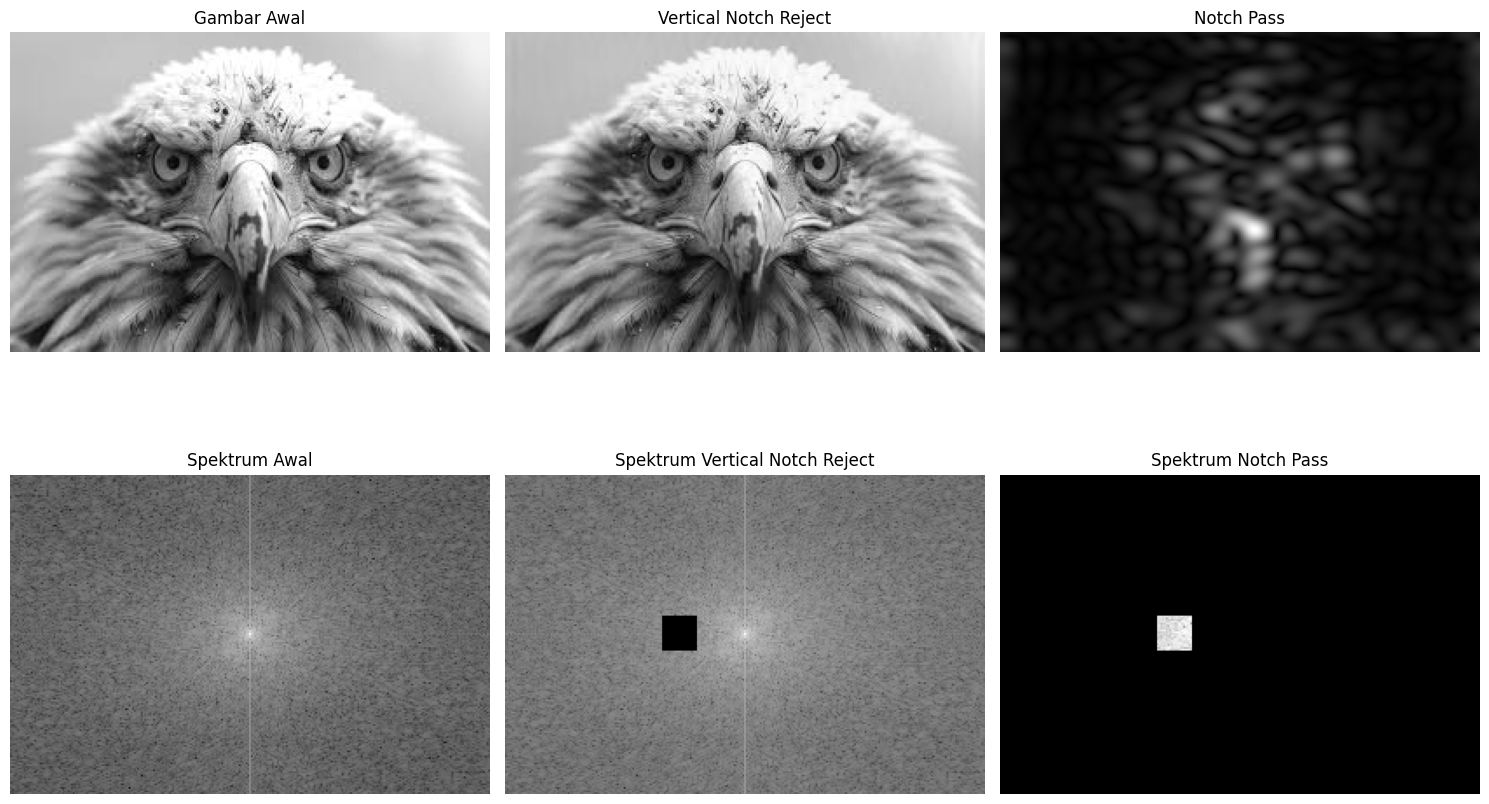

In [16]:
if __name__ == '__main__':
    img_path = open_file_dialog()
    if img_path:
        img = cv.imread(img_path)
        img = convert_to_grayscale(img)
        
        fshift, magnitude_spectrum = apply_fft(img)
        
        # Terapkan Vertical Notch Reject
        fshift_vnr = vertical_notch_reject(np.copy(fshift), notch_center=100, notch_width=10)
        
        # Terapkan Notch Pass
        fshift_np = notch_pass(np.copy(fshift), notch_center=100, notch_width=10)
        
        # Tampilkan hasilnya
        visualize(img, fshift, fshift_vnr, fshift_np)
    else:
        print("File tidak ditemukan.")